<a href="https://colab.research.google.com/github/YasuharuSuzuki/24_programing2/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習に関する問題

## 用語の理解を問う問題
- 以下の問題について、正解となる選択肢を出力してください

### 問題16 (3点)
過学習（Overfitting）の説明として最も適切なものを選択してください
   1. モデルが訓練データに対して過度に単純である状態
   2. モデルが訓練データを完全に学習しすぎて、テストデータに対して性能が低下する状態
   3. モデルが訓練データに対して十分に学習できない状態
   4. モデルがテストデータに対して過度に複雑である状態

In [1]:
# 正解を出力してください
print('2') # 過学習（Overfitting）とは、モデルが訓練データに対して非常に高い精度を持つ一方で、新しいデータ（テストデータ）に対して性能が低下する状態を指します。これは、モデルが訓練データのノイズや特異性を学習しすぎた結果です。

2


### 問題17 (3点)
テストデータ（Test Data）の説明として最も適切なものを選択してください
   1. モデルの訓練を行うためのデータ
   2. モデルのパラメータを最適化するためのデータ
   3. 訓練済みモデルの性能を評価するためのデータ
   4. データの前処理を行うためのデータ

In [2]:
# 正解を出力してください
print('3')  # テストデータ（Test Data）は、訓練済みモデルの性能を評価するために使用されます。このデータはモデルの訓練には使用されず、新しいデータに対するモデルの汎化能力を測定します。

3


### 問題18 (3点)
目的変数（Target Variable）の説明として最も適切なものを選択してください
   1. モデルを学習する際に入力データとなる、ある現象や値の原因となる変数のこと
   2. モデルを学習させることで予測したい変数のこと
   3. アンケート調査データの場合の無回答項目やカルテデータの場合の未検査項目のように，あるケースのある項目の値が欠落している変数のこと
   4. モデルの性能を評価する指標のこと

In [2]:
# 正解を出力してください
print('2')  # 目的変数（Target Variable）は、モデルが予測または分類する対象の変数です。訓練データにおいて、モデルはこの目的変数を基に学習を行います。

2


## プログラムを書く問題
- Auto-MPG-prediction のデータセットを使って、モデルの作成、評価を行ってください。

### Auto-MPG-prediction データセット
- 自動車のシリンダー数、馬力、重量等から、燃費を推測するデータセットです。
- `data/auto_mpg_customized.csv` のデータを読み込んで処理して行きましょう。
- 各列の名称と内容は以下の通りです。([Githubの情報](https://github.com/Munees11/Auto-MPG-prediction?tab=readme-ov-file#features-on-data-set)から抜粋)

| Variable | Definition |
| --- | --- |
| mpg | Taget Variable. contains the fuel consumption value(in Miles per Gallon) for car. |
| cylinders | contains the number of cylinders present in the car |
| displacement | contains the Displacement of the car |
| horsepower | contains the Horsepower of the car |
| weight | contains the weight of the car |
| acceleration | contains the Acceleration of the car |
| model_year | contains the model year of the car |
| origin | contains the origin country which car belong to |
| car_name | contains the name of the car(Brand-Model-Variant) |

### 問題19 モデルの作成 (9点)
- データセットを読み込み、欠損値の処理やカテゴリカル変数の対策を行って、モデルを作成してみましょう
  - データセットの読み込み（02pandas.ipynbと同じプログラムで大丈夫です）
  - 欠損値の対策（02pandas.ipynbと同じプログラムで大丈夫です）
  - カテゴリカル変数の対策
  - 説明変数と目的変数に分ける
  - モデルを学習する（学習に使用するモデルは何でも良いです。例：LinearRegression、SVR、RandomForestRegressor など）

In [23]:
# ライブラリのimport
import pandas as pd # pandasモジュールを読み込む（データ分析ライブラリ）
import numpy as np # NumPyモジュールを読み込む（数値演算ライブラリ）
import matplotlib.pyplot as plt # 可視化ライブラリ
import seaborn as sns # Seabornモジュールを読み込む（可視化ライブラリ。pairplotなど多くのデータ分析情報をplotするのに向いている）

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # 回帰モデルの性能評価用関数
from sklearn.preprocessing import LabelEncoder # 文字データを数字に置換するクラス（後述）
from sklearn.model_selection import train_test_split # scikit-learnの訓練データ / テストデータ 分割関数
from sklearn import metrics # scikit-learnの精度算出用ライブラリ
from sklearn import svm # scikit-learnのSVM(サポートベクターマシン)
from sklearn.ensemble import RandomForestRegressor # scikit-learnのRandomForest(ランダムフォレスト)

from mpl_toolkits.axes_grid1 import Divider, Size # matplotlib 領域修正用クラス
from mpl_toolkits.axes_grid1.mpl_axes import Axes # matplotlib 領域修正用クラス
from IPython.display import display as IPython_display  # Jupyter Notebook 可視化用ヘルパ

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショーットカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

In [5]:
# データファイルパス定義
AUTO_MPG_CSV = "./data/auto_mpg_customized.csv"

In [6]:
# read_csvを使ってcsvを読み込みます
df_auto1 = pd.read_csv(AUTO_MPG_CSV, index_col=0) # Auto-MPG-prediction データセットにindexがあるため、0で読み込みます
df_auto1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
1,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu
2,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320
3,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite
4,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst
5,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino


In [7]:
# 欠損値対策
df_auto2 = df_auto1.dropna(how='any')  # how='any'は全ての列のうちどれか１つでも欠損値を含む行を対象とすることを指定しています

In [8]:
# 欠損値が無くなったことを確認しましょう
df_auto2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 1 to 398
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   car_name      392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [11]:
# （ここまでやらなくていいですが）car_nameの前半分にメーカー名が入っているので、それを抽出します
df_auto3 = df_auto2.copy()
df_auto3['car_maker'] = [text.split()[0] for text in df_auto3['car_name'].values]
car_maker_value_counts = df_auto3['car_maker'].value_counts()
print(len(car_maker_value_counts))
IPython_display(car_maker_value_counts)
df_auto3 = df_auto3.drop('car_name', axis=1)
df_auto3.head(10)

37


car_maker
ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
vw                6
chrysler          6
volvo             6
opel              4
saab              4
subaru            4
chevy             3
renault           3
maxda             2
cadillac          2
bmw               2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: count, dtype: int64

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_maker
1,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet
2,15.0,8,350.0,165.0,3693,11.5,70,USA,buick
3,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth
4,16.0,8,304.0,150.0,3433,12.0,70,USA,amc
5,17.0,8,302.0,140.0,3449,10.5,70,USA,ford
6,15.0,8,429.0,198.0,4341,10.0,70,USA,ford
7,14.0,8,454.0,220.0,4354,9.0,70,USA,chevrolet
8,14.0,8,440.0,215.0,4312,8.5,70,USA,plymouth
9,14.0,8,455.0,225.0,4425,10.0,70,USA,pontiac
10,15.0,8,390.0,190.0,3850,8.5,70,USA,amc


In [13]:
# カテゴリカル変数の対策
categories = ['origin','car_maker']  # カテゴリカル変数の対象とする列を指定する

df_auto4 = df_auto3.copy()  # DataFrameを書き換えるため、コピーしておく
for category in categories:
    label_encoder = LabelEncoder()  # 文字列を数値に変換するクラスのインスタンスを作成
    label_encoder = label_encoder.fit(df_auto4[category])  # fit関数で文字列と数値の関係を取得
    df_auto4[category] = label_encoder.transform(df_auto4[category])  # transformで変換を実行
    df_auto4[category] = df_auto4[category].astype('category') # カテゴリカル変数には専用の型'category'があるため、型変換しておく
    print(df_auto4[category].value_counts())  # 変換後の値を表示

origin
2    245
1     79
0     68
Name: count, dtype: int64
car_maker
13    48
7     43
25    31
11    28
0     27
30    25
10    23
3     17
26    16
34    15
15    13
20    11
22    10
17    10
12     8
24     8
1      7
35     6
36     6
9      6
28     4
23     4
29     4
8      3
27     3
16     2
2      2
4      2
19     2
6      1
5      1
31     1
32     1
33     1
14     1
21     1
18     1
Name: count, dtype: int64


In [14]:
# 説明変数と目的変数に分ける
X = df_auto4.iloc[:,1:]
y = df_auto4.iloc[:,0]

In [15]:
# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  # 7:3で分割

In [17]:
# 学習する
svr_model = svm.SVR()    # モデルを作る
svr_model.fit(X_train, y_train)    # 訓練する

SVR()

### 問題20 モデルの評価 (12点)
- 以下のいずれかの評価を少なくとも２つ行って、それぞれに最低１つの簡単な考察をつけてみましょう
  - エラーレートと決定係数を出力する
  - 残差の可視化によるモデル評価
  - 混合行列(confusion matrix)を表示する
  - FeatureImportanceを表示する(決定木系のモデルでしか使用できません)

In [24]:
# エラーレートと決定係数の算出を行うユーザー定義関数
def evaluate_metrics(y_train_pred, y_test_pred):
    # 学習時スコア
    train_MAE = mean_absolute_error(y_train, y_train_pred)
    train_MSE = mean_squared_error(y_train, y_train_pred)
    train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_R2 = r2_score(y_train, y_train_pred)
    
    # テスト時スコア
    test_MAE = mean_absolute_error(y_test, y_test_pred)
    test_MSE = mean_squared_error(y_test, y_test_pred)
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_R2 = r2_score(y_test, y_test_pred)
    
    print("学習時スコア(train score)")
    print("　平均絶対誤差: ", train_MAE)
    print("　平均二乗誤差: ", train_MSE)
    print("　二乗平均平方根誤差: ", train_RMSE)
    print("　決定係数R^2: ", train_R2)
    
    print("テストスコア(test score)")
    print("　平均絶対誤差: ", test_MAE)
    print("　平均二乗誤差: ", test_MSE)
    print("　二乗平均平方根誤差: ", test_RMSE)
    print("　決定係数R^2: ", test_R2)

In [25]:
y_train_pred = svr_model.predict(X_train)  # 学習データを使って推論する
y_test_pred = svr_model.predict(X_test)  # テストデータを使って推論する

evaluate_metrics(y_train_pred, y_test_pred)

学習時スコア(train score)
　平均絶対誤差:  3.0632278513350397
　平均二乗誤差:  18.202150678770185
　二乗平均平方根誤差:  4.266397857533939
　決定係数R^2:  0.6975570317896498
テストスコア(test score)
　平均絶対誤差:  3.3108749631960115
　平均二乗誤差:  22.223646116594857
　二乗平均平方根誤差:  4.7141962322961115
　決定係数R^2:  0.6387312844512584


- MAE 3 m/Gなら、初手としては悪くないのではないでしょうか
- 決定係数ももう少し上げたいところですね

In [30]:
# 残差の可視化を行うユーザー定義関数
def residual_plot(y_train_pred, y_test_pred):
    Y_COLUMN = 'mpg'
    df_train = pd.DataFrame(y_train)
    df_train['y_train_pred'] = y_train_pred
    
    df_test = pd.DataFrame(y_test)
    df_test['y_test_pred'] = y_test_pred
    
    ax = plt.gca()
    
    # 傾き1の直線を追加
    a_line=[min(df_train[Y_COLUMN].min(), df_test[Y_COLUMN].min()), max(df_train[Y_COLUMN].max(), df_test[Y_COLUMN].max())]
    sns.regplot(x=df_train[Y_COLUMN], y=df_train['y_train_pred'],label='train')
    sns.regplot(x=df_test[Y_COLUMN], y=df_test['y_test_pred'],label='test')
    sns.regplot(x=a_line, y=a_line,ci=None, scatter=False, line_kws={'color': 'orange', 'linestyle': '--', 'lw': 1},label='residual 0')
    
    ax.set_xlabel('true')
    ax.set_ylabel('pred')
    
    plt.legend(fontsize=10)
    plt.show()

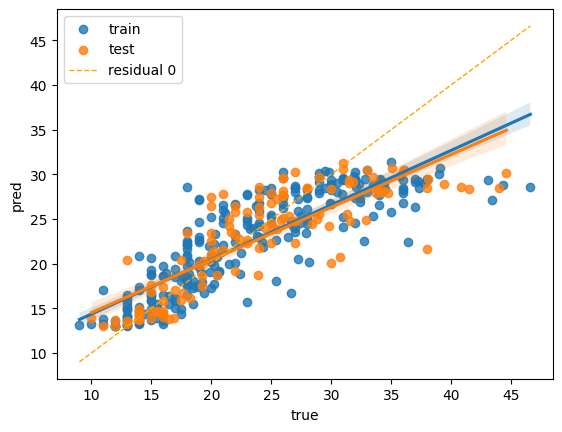

In [31]:
# 残差の可視化を行うユーザー定義関数を呼び出す
residual_plot(y_train_pred, y_test_pred)

- trainとtestの傾向はほぼ同じ。過学習は起きていなそうです
- 値が大きくなればなるほど下振れするモデルになっていて、非線形のモデルの方が合いそうです

---
---

### RandomForestでの学習例

In [41]:
# RandomForestで学習させる
rf_model = RandomForestRegressor(max_depth=5)    # max_depth のパラメータを指定する
rf_model.fit(X_train, y_train)     # 訓練データと教師データで学習する

RandomForestRegressor(max_depth=5)

In [42]:
y_train_pred = rf_model.predict(X_train)  # 学習データを使って推論する
y_test_pred = rf_model.predict(X_test)  # テストデータを使って推論する

# エラーレートの確認
evaluate_metrics(y_train_pred, y_test_pred)

学習時スコア(train score)
　平均絶対誤差:  1.30712022873578
　平均二乗誤差:  2.9129309861533867
　二乗平均平方根誤差:  1.706731081967334
　決定係数R^2:  0.9515993736568905
テストスコア(test score)
　平均絶対誤差:  1.9276214669818084
　平均二乗誤差:  8.404331574645644
　二乗平均平方根誤差:  2.899022520548201
　決定係数R^2:  0.8633787607538101


- かなりR^2あがりましたね
- エラーレートもだいぶ小さくなっています

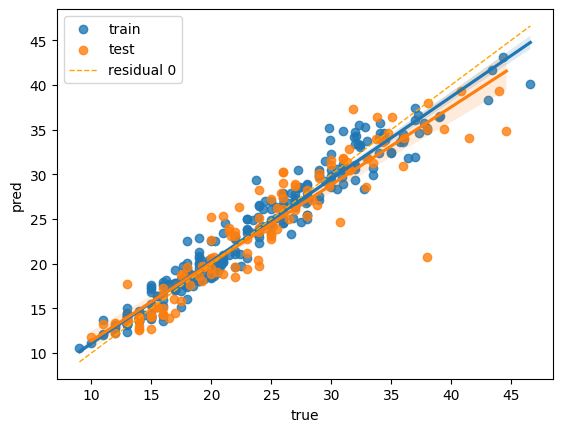

In [43]:
# 残差の可視化を行うユーザー定義関数を呼び出す
residual_plot(y_train_pred, y_test_pred)

- 先程よりtrain / test ともに residual 0 に近く、モデルの性能が良くなっていることが伺えます

In [44]:
def _convert_column_name_for_feature_importance(columns):
    new_columns = []
    for name_src in columns:
        new_columns.append(name_src)

    return new_columns

# figureをmargin付きで作成する
def _make_figure_with_margin(ax_w_px=400, ax_h_px=300, ax_margin_px = (50, 50, 50, 50), fig_dpi=100):

    # サイズ指定のための処理 ↓↓ ここから ↓↓ 
    ax_w_inch = ax_w_px / fig_dpi
    ax_h_inch = ax_h_px / fig_dpi
    ax_margin_inch = (ax_margin_px[0] / fig_dpi,
                      ax_margin_px[1] / fig_dpi,
                      ax_margin_px[2] / fig_dpi,
                      ax_margin_px[3] / fig_dpi)  # Left,Top,Right,Bottom [inch]

    fig_w_inch = ax_w_inch + ax_margin_inch[0] + ax_margin_inch[2] 
    fig_h_inch = ax_h_inch + ax_margin_inch[1] + ax_margin_inch[3]

    fig = plt.figure(dpi=fig_dpi, figsize=(fig_w_inch, fig_h_inch))
    ax_p_w = [Size.Fixed(ax_margin_inch[0]),Size.Fixed(ax_w_inch)]
    ax_p_h = [Size.Fixed(ax_margin_inch[1]),Size.Fixed(ax_h_inch)]
    divider = Divider(fig, (0.0, 0.0, 1.0, 1.0), ax_p_w, ax_p_h, aspect=False)
    ax = Axes(fig, divider.get_position())
    ax.set_axes_locator(divider.new_locator(nx=1,ny=1))
    fig.add_axes(ax)
    return fig, ax

# FeatureImportanceをplotする
def _plot_feature_importances(x_column_names, best_estimator):
    importances = pd.DataFrame(
        {"features": _convert_column_name_for_feature_importance(x_column_names),
         "importances": best_estimator.feature_importances_})

    importances = importances[importances['importances'] != 0] # 重要度ゼロのものは表示しない
    importances.sort_values(by="importances", inplace=True, ignore_index=True, ascending=True)
    
    fig, ax = _make_figure_with_margin(800, 100+50*len(importances), ax_margin_px = (150, 50, 50, 50))
    plt.barh(importances['features'], importances['importances'])
    plt.title("Feature Importances (Zero variables are hidden)", fontsize=14)
    plt.show()

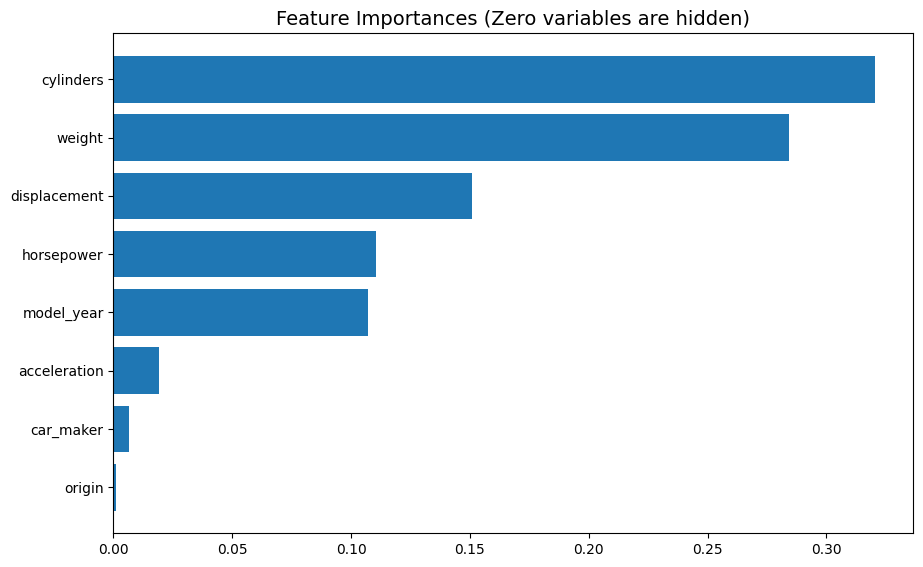

In [45]:
_plot_feature_importances(X_train.columns, rf_model)

- car_makerやoriginはほとんど効いていませんね
- シリンダー数や車両重量、排気量など、基本的な性能の影響がかなり大きいです。

---
---
---
---
---